# Sales_Analysis

### Import Necessary Libraries

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Number of files in Sales Data

In [31]:
df = pd.read_csv(r"C:/Users/archi/Downloads/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir(r"C:/Users/archi/Downloads/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data")]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### Concatenate data from each month into one CSV

In [32]:
df = pd.read_csv(r"C:/Users/archi/Downloads/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir(r"C:/Users/archi/Downloads/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data")]

all_month_sales = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:/Users/archi/Downloads/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/"+file)
    all_month_sales = pd.concat([all_month_sales, df])
    
all_month_sales.to_csv("sales_data.csv", index=False)

### Read in update dataframe

In [33]:
sales_data = pd.read_csv("sales_data.csv")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!

The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data.

#### Drop rows of NaN

In [34]:
# Find NAN
nan_df = sales_data[sales_data.isna().any(axis=1)]
nan_df.head()

sales_data = sales_data.dropna(how='all')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Get rid of text in order date column

In [35]:
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Conversion of data types from string to integer

In [36]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [37]:
##sales_data['Month'] = sales_data['Order Date'].str[0:2] (Method_1)
sales_data['Month'] = pd.to_datetime(sales_data['Order Date']).dt.month #Method_2
sales_data['Month'] = sales_data['Month'].astype('int32')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add City Column

In [38]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


#### Calculation of Sales

In [39]:
sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


### Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month?

In [40]:
results = sales_data.groupby(['Month']).sum(numeric_only = True)
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


### Plotting the graph of Sales vs Month

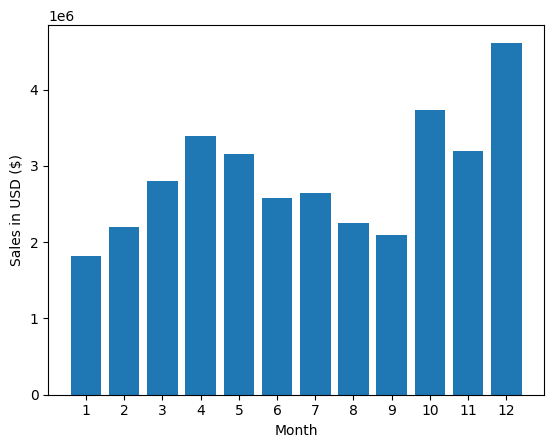

In [41]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

#### Question 2: What city sold the most product?

In [42]:
results_1 = sales_data.groupby(['City']).sum(numeric_only = True)
results_1

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


### Plotting the graph of Sales vs City

C:\Users\archi\AppData\Local\Temp\ipykernel_1276\2573030801.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  cities = [city for city, df in sales_data.groupby(['City'])]


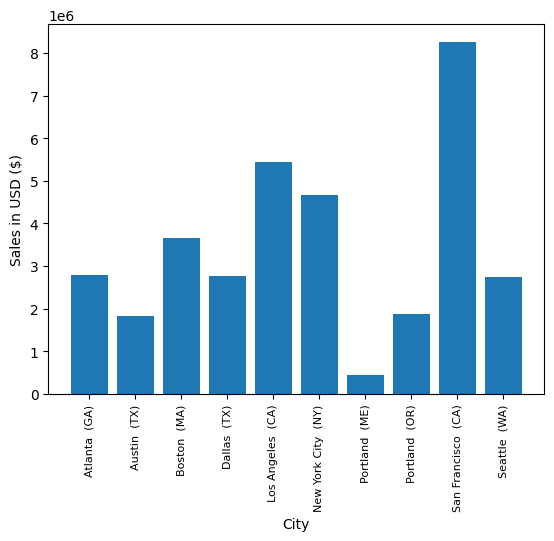

In [43]:
cities = [city for city, df in sales_data.groupby(['City'])]

plt.bar(cities, results_1['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [44]:
# Add hour column
sales_data['Hour'] = pd.to_datetime(sales_data['Order Date']).dt.hour
sales_data['Minute'] = pd.to_datetime(sales_data['Order Date']).dt.minute
sales_data['Count'] = 1
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


### Plotting the graph of Sales vs Hour

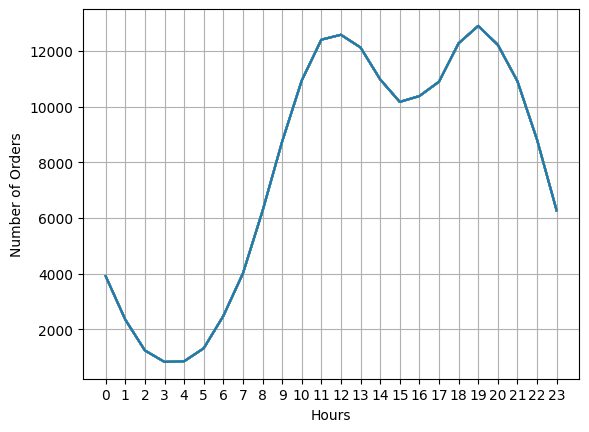

In [45]:
hours = [hour for hour, df in sales_data.groupby('Hour')]

plt.plot(hours, sales_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel('Hours')
plt.grid()
plt.show()

This chart indicates that we should display the advertise right before 11 am or 12 pm or it should put an ad at 7 pm because those were the peaks when all the orders in our dataset happened

#### Question 4: What products are most often sold together?

In [46]:
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]

In [47]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

C:\Users\archi\AppData\Local\Temp\ipykernel_1276\1704605575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


#### Counting unique pairs of Grouped Products

In [49]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

In [50]:
results_2 = sales_data.groupby(['Product']).sum(numeric_only = True)
results_2

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,6230
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603,13325
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789,4800


### Plotting the graph of Ordered Quantity vs Product

C:\Users\archi\AppData\Local\Temp\ipykernel_1276\2758272507.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  cities = [city for city, df in sales_data.groupby(['Product'])]


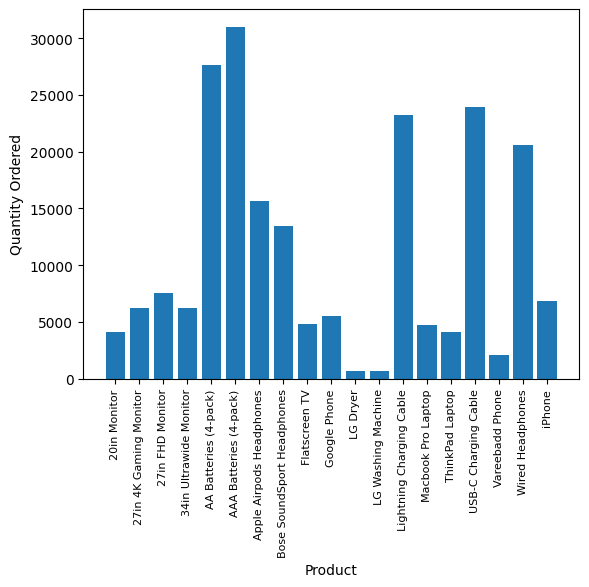

In [53]:
products = [product for product, df in sales_data.groupby(['Product'])]

plt.bar(products, results_2['Quantity Ordered'])
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

This chart indicates that AAA Batteries are the most effective product sold in this market because it is the most cheapest product in the eletronis manufacturing market.

#### Questions 6: What product price the most? Plot the graph.

In [57]:
results_3 = sales_data.groupby(['Product']).mean(numeric_only = True)
results_3

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,1.006828,109.99,7.153377,110.740968,14.329188,29.810290,1.0
27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382,14.593258,29.587640,1.0
27in FHD Monitor,1.005728,149.99,7.001199,150.849141,14.325296,29.299054,1.0
34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588,14.411260,29.684517,1.0
AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137,14.498809,29.598046,1.0
AAA Batteries (4-pack),1.502689,2.99,7.091226,4.493040,14.404922,29.655201,1.0
Apple Airpods Headphones,1.007203,150.00,7.040774,151.080455,14.361309,29.298990,1.0
Bose SoundSport Headphones,1.009906,99.99,7.062889,100.980520,14.442402,29.463640,1.0
Flatscreen TV,1.003958,300.00,7.130000,301.187500,14.336458,29.747708,1.0


C:\Users\archi\AppData\Local\Temp\ipykernel_1276\1688503313.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  prices = [price for price, df in sales_data.groupby(['Product'])]
C:\Users\archi\AppData\Local\Temp\ipykernel_1276\1688503313.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\archi\AppData\Local\Temp\ipykernel_1276\1688503313.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


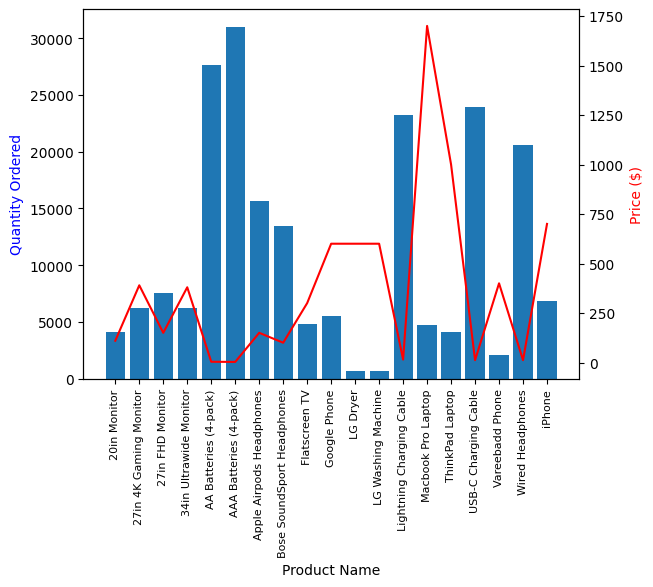

In [60]:
prices = [price for price, df in sales_data.groupby(['Product'])]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, results_2['Quantity Ordered'])
ax2.plot(products, results_3['Price Each'], color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

# Conclusion

This chart shows that higher the price of products, lesser would be the quantity ordered whereas lower the price of products, greater would be the quantity ordered.